# Importing our libraries... *

In [1]:
import os

import tensorflow as tf

import pandas as pd
import glob
import xml.etree.ElementTree as ET

print("Finished!")


Finished!


# Creating ***customTF2***, and inside that, ***training*** and ***data*** folders in google drive


# How we trained our own model (COLLAPSE IF YOU WANT TO USE TRAINED)

## Upload the image files
folder named ***images*** for dataset images and another folder named ***annotations*** for its corresponding xml files








## Labelling image files to retrieve their XML

We will have to run this outside of the colab!

### 1) Download [OpenLabelling](https://github.com/techzizou/OpenLabeling) and unzip

It's a python script which allows us to label objects within our images with classes for use in training.

After unzipping, navigate to the ***OpenLabeling-master*** folder

## 2) Make sure the modules in ***requirement.txt*** are installed


Run the following after navigating to ***OpenLabeling-master*** folder in the command prompt
```
pip install -r requirements.txt
```



## 3) Navigate to ***main*** and open up class_list.txt

Go line by line typing out each class, for example,
```
Alien
Human
```

## 4) Put all your ".JPG" images inside the ***input*** folder

Remember, it has to end with ".jpg", or it will not work.

## 5) Run the main.py script

This will create the output folder and open the GUI for labeling.

## 6) Start labeling!

Once you have labeled them all, you can copy the xml files over to another place.

## Upload the ***generate_tfrecord.py*** file to the ***customTF2*** folder on your drive.**bold text**

Found [here](https://github.com/techzizou/Train-Object-Detection-Model-TF-2.x)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20190329_151514.jpg
 20190329_151545.jpg
 20190329_151614.jpg
'Aztler GSHeet D&D.gsheet'
 Classroom
 CoinbaseWalletBackups
'Colab Notebooks'
'Copy of 30 Days to Better Habits: Examples Database.gsheet'
'Copy of ER - Weapon Usability v0.3.1.gsheet'
'Copy of Gestalt Avrae Readable Gsheet.gsheet'
'Copy of GSheet v2.1 (1).gsheet'
'Copy of GSheet v2.1 (2).gsheet'
'Copy of GSheet v2.1.gsheet'
'Copy of Item Sheets.gsheet'
'Copy of OSSU CS Timeline .gsheet'
'Copy of PHB.pdf'
'Copy of WorldFoodDay.gslides'
 customTF2
'D&D Discord Server Timetables.gsheet'
'D&D EA.gsheet'
'Download2021.12.05.23.45.36_New IGCSE Admission Form.pdf.PDF'
'Editable Fix Character Values Buttons.gscript'
 eroan.gsheet
 first-order-motion-model
'GIIS SG (PG) Grade 10 English Language Worksheet 2023-24 April-May.gdoc'
 GP
'GSheet v2.1.gsheet'
'How to play D&D.gdoc'
"JoJo's Bizarre Adventure_ Stardust Crusaders OST - Stardust Crusaders.mp3"
'Life Level.gsheet'
'Life Timetable.gsheet'
'LudicSava

In [ ]:
# clone the tensorflow models on the colab cloud vm
!git clone --q https://github.com/tensorflow/models.git

#navigate to /models/research folder to compile protos
%cd models/research

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .


In [4]:
# testing the model builder
!python object_detection/builders/model_builder_tf2_test.py

2023-07-29 05:31:08.712494: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/pytho

In [14]:
%cd /mydrive/customTF2/data/

/content/gdrive/My Drive/customTF2/data


## Create the CSV files and the "label_map.pbtxt" file

The xml_to_csv script creates the CSVs, ***test_labels.csv*** and ***train_labels.csv***, make sure to run it

This also creates the ***label_map.pbtxt*** file using the classes mentioned in the xml files.

In [24]:
# used from xml to csv from https://github.com/techzizou/Train-Object-Detection-Model-TF-2.x
def xml_to_csv(path):
  classes_names = []
  xml_list = []

  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      classes_names.append(member[0].text)
      value = (root.find('filename').text  ,
               int(root.find('size')[0].text),
               int(root.find('size')[1].text),
               member[0].text,
               int(member[4][0].text),
               int(member[4][1].text),
               int(member[4][2].text),
               int(member[4][3].text))
      xml_list.append(value)
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name)
  classes_names = list(set(classes_names))
  classes_names.sort()
  return xml_df, classes_names

for label_path in ['train_labels', 'test_labels']:
  image_path = os.path.join(os.getcwd(), label_path)
  xml_df, classes = xml_to_csv(label_path)
  xml_df.to_csv(f'{label_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

label_map_path = os.path.join("label_map.pbtxt")
pbtxt_content = ""

for i, class_name in enumerate(classes):
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(i + 1, class_name)
    )
pbtxt_content = pbtxt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)
    print('Successfully created label_map.pbtxt ')

Successfully converted train_labels xml to csv.
Successfully converted test_labels xml to csv.
Successfully created label_map.pbtxt 


In [25]:
!python /mydrive/customTF2/generate_tfrecord.py train_labels.csv  label_map.pbtxt images/ train.record
!python /mydrive/customTF2/generate_tfrecord.py test_labels.csv  label_map.pbtxt images/ test.record

2023-07-29 04:05:17.959410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
groups: 100% 132/132 [00:34<00:00,  3.83it/s]
Successfully created the TFRecords: /content/gdrive/MyDrive/customTF2/data/train.record
2023-07-29 04:05:57.350963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
groups: 100% 33/33 [00:08<00:00,  3.83it/s]
Successfully created the TFRecords: /content/gdrive/My Drive/customTF2/data/test.record


## Download pre-trained model checkpoint

Download **ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz** into the ***data*** folder & unzip it.

A list of detection checkpoints for tensorflow 2.x can be found [here](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md).



In [15]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2023-07-29 05:44:06--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.202.128, 2607:f8b0:400e:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.202.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  75.2MB/s    in 0.3s    

2023-07-29 05:44:06 (75.2 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tp

## Get the model pipeline config file, make changes to it and put it inside the ***data*** folder

Downloaded **ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config** from ***/content/models/research/object_detection/configs/tf2*** and uploaded it to the ***/mydrive/custom/data*** folder.

Changes needed: num_classes, all PATHs, fine_tune_checkpoint, fine_tune_checkpoint_type, batch_size, num_steps






## Load Tensorboard *

In [7]:
#load tensorboard

%load_ext tensorboard
%tensorboard --logdir '/content/gdrive/MyDrive/customTF2/training'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-07-29 05:35:04.631751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

## Train the model *






In [17]:
%cd /content/models/research/object_detection

/content/models/research/object_detection


###Training

In [19]:
!python model_main_tf2.py --pipeline_config_path=/mydrive/customTF2/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --model_dir=/mydrive/customTF2/training --alsologtostderr

2023-07-29 05:49:17.147179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/pytho

Text(0, 0.5, 'Loss')

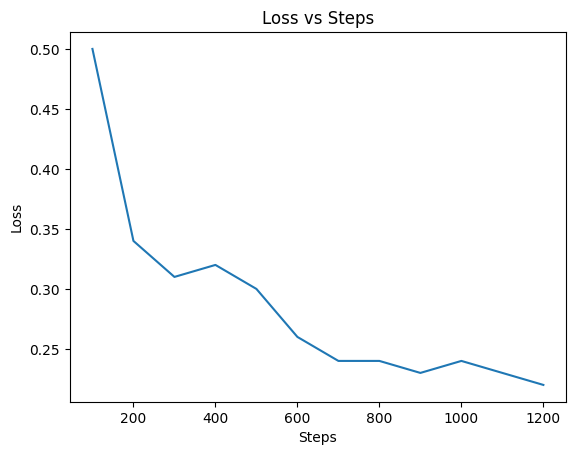

In [39]:
import matplotlib.pyplot as plt

loss = [0.5,0.34,0.31,0.32,0.3,0.26,0.24,0.24,0.23,0.24,0.23,0.22]
steps = [100,200,300,400,500,600,700,800,900,1000,1100,1200]

plt.plot(steps,loss)
plt.title("Loss vs Steps")
plt.xlabel("Steps")
plt.ylabel("Loss")

In [ ]:
##Export inference graph
!python exporter_main_v2.py --trained_checkpoint_dir=/mydrive/customTF2/training --pipeline_config_path=/content/gdrive/MyDrive/customTF2/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --output_directory /mydrive/customTF2/data/inference_graph

# Using our trained alien detection model

## Download [this](https://github.com/r3xsean/alien_detection/blob/main/inference_graph-20230729T070618Z-001.zip) and unzip in data folder, also download [this](https://github.com/r3xsean/alien_detection/blob/main/label_map.pbtxt) and put inside data folder

# Using the model

## Find the image_path line and change it to the path of your image, then run the file!

Loading model...Done!


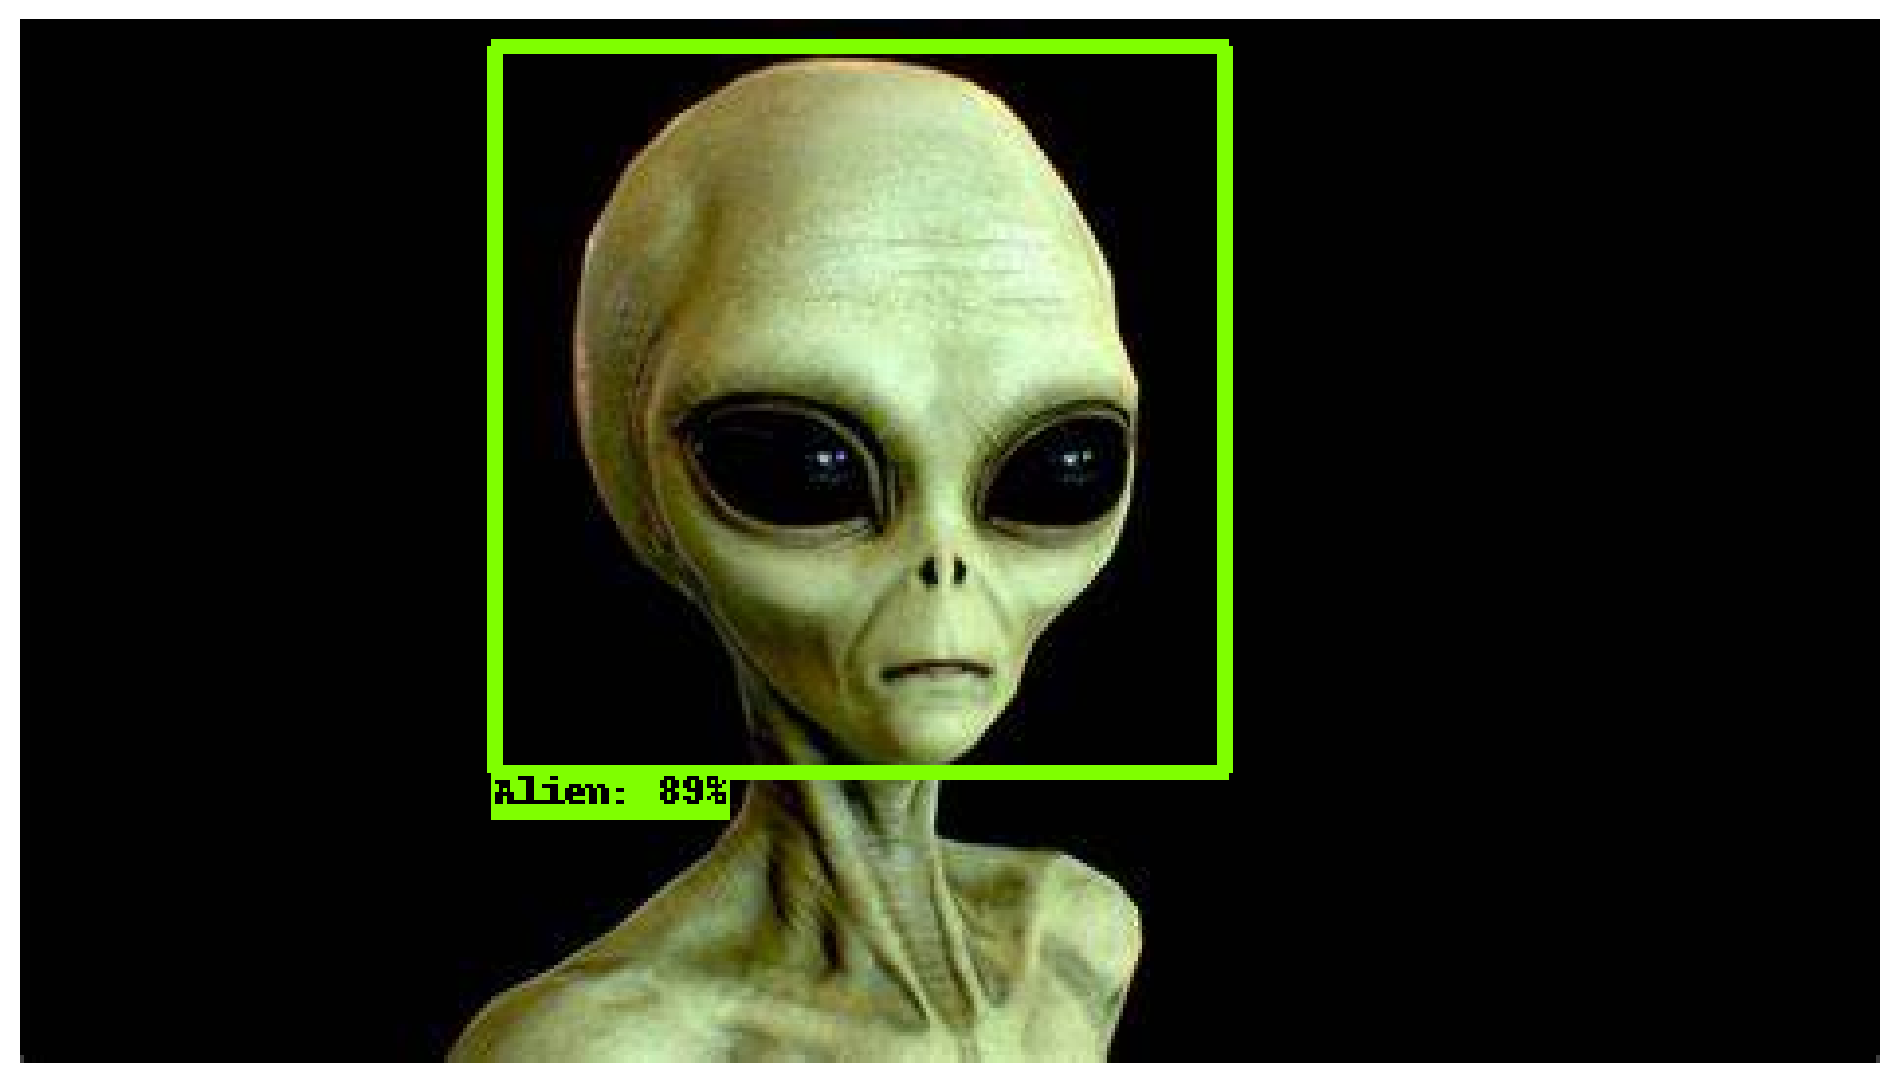

In [38]:
#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL="/mydrive/customTF2/data/inference_graph/saved_model"
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/mydrive/customTF2/data/label_map.pbtxt",use_display_name=True)

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

image_path = "/mydrive/alien_test.jpg" # IMAGE PATH IMAGE PATH IMAGE PATH

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections')) #num detections has to be an integer
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # min probability of box being correct
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()